In [1]:
# Sample API
import flowx
import simulation
print(flowx.__environment__, flowx.__version__)

serial 0.1.dev


In [2]:
# Define grid parameters
nx, ny = 120, 40
xmin, xmax = -3.0, 12.5
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'delp']
face_vars     = ['velc', 'hvar']

ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 200, 
                     dt = 0.01, 
                     Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'superLU', 
                       maxiter = 2000,
                       tol = 1e-10, with_ib = True)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5', vel = [0.0,0.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'outflow', 'neumann', 'neumann'])
bc_val_facex  = dict(velc = [1.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5528499572083307e-11
Total poisson time : 0.004454135894775391
Total INS time : 0.006024837493896484
Max, Min, U   : 1.3812280947352322, 0.3406848629221704
Max, Min, V   : 0.4345986575190422, -0.43459865751904275
Max, Min, P   : 30.311768559486545, -21.26982167507315
Max, Min, DIV : 0.24050828836147264, -0.23199356150222128
Qin, Qout     : 5.0, 5.0


------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.686511097797307e-13
Total poisson time : 0.0011546611785888672
Total INS time : 0.00410914421081543
Max, Min, U   : 1.76891335599925, -0.17357127419952814
Max, Min, V   : 0.8833031003577991, -0.8833031003577994
Max, Min, P   : 30.57009041277542, -22.405807052103114
Max, Min, DIV : 0.13232253747882528, -0.21423410975963897
Qin, Qout     : 5.0, 5.0


------------ Time = 0.03 ---------------
Number of poisson iterations    : None
Fi

------------ Time = 0.3300000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.036464468507032e-14
Total poisson time : 0.0054018497467041016
Total INS time : 0.019323110580444336
Max, Min, U   : 1.6165654995576757, -0.01311481171912903
Max, Min, V   : 1.081100855916461, -1.0811008559164603
Max, Min, P   : -1.2104414740567389, -3.4884573372136742
Max, Min, DIV : 0.005042612598111534, -0.003973410433424807
Qin, Qout     : 5.0, 5.0


------------ Time = 0.34000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.913538355179801e-14
Total poisson time : 0.0010819435119628906
Total INS time : 0.017621994018554688
Max, Min, U   : 1.6124141470625413, -0.009232384069933052
Max, Min, V   : 1.0789543950118061, -1.0789543950118055
Max, Min, P   : -1.2406832909416567, -3.515994901021811
Max, Min, DIV : 0.0035107545492397974, -0.002734474412048271
Qin, Qout     : 5.0, 5.0


------------ Time = 0.35000000000000014 -

------------ Time = 0.6300000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7922524283654458e-13
Total poisson time : 0.0013439655303955078
Total INS time : 0.007528066635131836
Max, Min, U   : 1.5998032850491084, -0.01477660086618369
Max, Min, V   : 1.066664082249245, -1.0666640822492448
Max, Min, P   : -2.1384039201098526, -4.355638125252761
Max, Min, DIV : 0.0001531138031550805, -7.824082654034554e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 0.6400000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1646868731582588e-13
Total poisson time : 0.0010750293731689453
Total INS time : 0.0051898956298828125
Max, Min, U   : 1.5981008322182821, -0.01851293927619417
Max, Min, V   : 1.0665207366042548, -1.0665207366042548
Max, Min, P   : -2.1872045698066627, -4.4026955590209615
Max, Min, DIV : 0.00015433307876039446, -0.00010671397083925516
Qin, Qout     : 5.0, 5.0


------------ Time = 0.6500000000000

------------ Time = 0.9900000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4318437881461193e-13
Total poisson time : 0.0010929107666015625
Total INS time : 0.004457950592041016
Max, Min, U   : 1.5370650110873538, -0.12300844403609196
Max, Min, V   : 1.0459635369541684, -1.0459635369541684
Max, Min, P   : -3.3856534959911735, -5.50821701527461
Max, Min, DIV : 0.00012970640527398825, -0.00016686461701260254
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.832750087864164e-14
Total poisson time : 0.0010120868682861328
Total INS time : 0.006417036056518555
Max, Min, U   : 1.5374186202909512, -0.1251670594428359
Max, Min, V   : 1.0452582487890876, -1.0452582487890876
Max, Min, P   : -3.3444909637085027, -5.464779883279436
Max, Min, DIV : 0.00012675846575471716, -0.00016550126767879772
Qin, Qout     : 5.0, 5.0




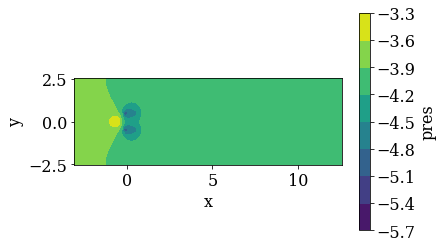

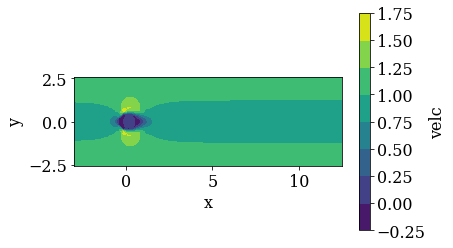

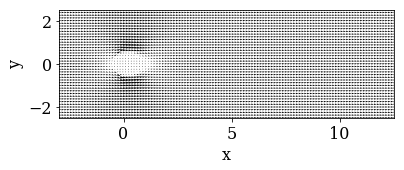

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.997555127519285e-14
Total poisson time : 0.0018339157104492188
Total INS time : 0.003804922103881836
Max, Min, U   : 1.5376894337250968, -0.12727393346821345
Max, Min, V   : 1.0445613412103392, -1.0445613412103392
Max, Min, P   : -3.3084216044747525, -5.426455692583112
Max, Min, DIV : 0.00012366653758477675, -0.0001639579834559939
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1342182086624898e-13
Total poisson time : 0.0015270709991455078
Total INS time : 0.008352994918823242
Max, Min, U   : 1.5378700543745116, -0.12932886804821267
Max, Min, V   : 1.0438729592333889, -1.0438729592333886
Max, Min, P   : -3.2616712547463518, -5.377472138780728
Max, Min, DIV : 0.00012045325848253352, -0.00016219022920660985
Qin, Qout     : 5.0, 5.0


------------ Time = 1.03000000000000

------------ Time = 1.360000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4712733619010916e-14
Total poisson time : 0.0010349750518798828
Total INS time : 0.005541086196899414
Max, Min, U   : 1.5063261348184322, -0.25412386053142794
Max, Min, V   : 1.0241616467522272, -1.0241616467522268
Max, Min, P   : -2.965803220004873, -5.013869879041005
Max, Min, DIV : 5.131236603556858e-05, -6.676126114422108e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.370000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.841981269164932e-14
Total poisson time : 0.0010859966278076172
Total INS time : 0.005706071853637695
Max, Min, U   : 1.5055472299348203, -0.256701317135248
Max, Min, V   : 1.0236562848712718, -1.0236562848712714
Max, Min, P   : -2.935344545063639, -4.981707961357867
Max, Min, DIV : 5.062934820994347e-05, -6.462258158032325e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.380000000000001 -------

------------ Time = 1.5800000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0214337279732114e-13
Total poisson time : 0.0039920806884765625
Total INS time : 0.011189937591552734
Max, Min, U   : 1.4985898067801091, -0.2971197833892136
Max, Min, V   : 1.014090546584562, -1.0140905465845618
Max, Min, P   : -3.5681815854860988, -5.583907326201497
Max, Min, DIV : 3.7786380206703625e-05, -3.313213190849829e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.5900000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.719925932723687e-13
Total poisson time : 0.0013828277587890625
Total INS time : 0.009356021881103516
Max, Min, U   : 1.4984216122929508, -0.3004361197065415
Max, Min, V   : 1.0136871292672907, -1.0136871292672904
Max, Min, P   : -3.6875147424839008, -5.701993765342315
Max, Min, DIV : 3.731137285156597e-05, -3.210022384764671e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.6000000000000012 --

------------ Time = 1.8100000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8956867288455804e-13
Total poisson time : 0.0012671947479248047
Total INS time : 0.013791084289550781
Max, Min, U   : 1.4913647296059078, -0.35501935598103174
Max, Min, V   : 1.005960492585333, -1.0059604925853323
Max, Min, P   : -5.978039619746768, -7.968326827109894
Max, Min, DIV : 2.8908913527195853e-05, -1.4742066902329043e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.8200000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9517280474612624e-13
Total poisson time : 0.001737833023071289
Total INS time : 0.010504007339477539
Max, Min, U   : 1.490937850452539, -0.35674558361947645
Max, Min, V   : 1.0056591471624532, -1.0056591471624527
Max, Min, P   : -5.899033933526663, -7.888350964268124
Max, Min, DIV : 2.8569296455160974e-05, -1.4653358731298027e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 1.8300000000000014 

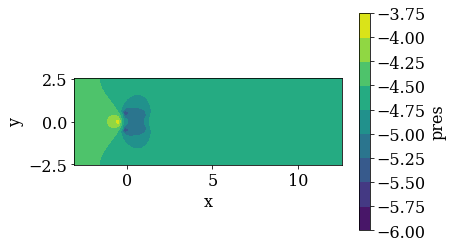

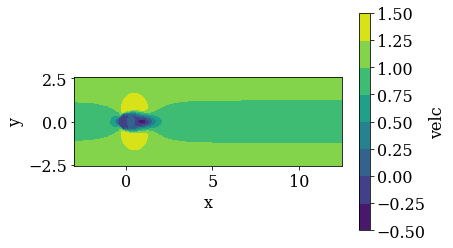

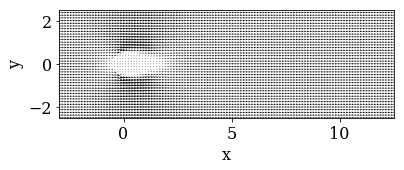

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.774309754868114e-13
Total poisson time : 0.001667022705078125
Total INS time : 0.003978252410888672
Max, Min, U   : 1.4839437293611715, -0.3796469256447457
Max, Min, V   : 1.0006398585235572, -1.0006398585235567
Max, Min, P   : -3.809142085486509, -5.7821055461271
Max, Min, DIV : 2.2625331723265143e-05, -1.3693419892990555e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9951513762089213e-13
Total poisson time : 0.0022530555725097656
Total INS time : 0.0069959163665771484
Max, Min, U   : 1.483667670474192, -0.3803997120477812
Max, Min, V   : 1.0004082944510637, -1.000408294451063
Max, Min, P   : -3.646516738631366, -5.618725570223382
Max, Min, DIV : 2.235118324317106e-05, -1.3647233880753618e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.0300000000000007 -------

------------ Time = 2.3199999999999945 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4931940451791713e-13
Total poisson time : 0.001233816146850586
Total INS time : 0.006162881851196289
Max, Min, U   : 1.478098017584587, -0.41419049706274497
Max, Min, V   : 0.9946382836208849, -0.9946382836208845
Max, Min, P   : -3.9010929922888358, -5.854350182374882
Max, Min, DIV : 1.5732381478894553e-05, -1.1414333336096094e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.3299999999999943 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3373192473279134e-13
Total poisson time : 0.0015521049499511719
Total INS time : 0.008672237396240234
Max, Min, U   : 1.477959477045887, -0.4150803798765153
Max, Min, V   : 0.9944836688538682, -0.9944836688538677
Max, Min, P   : -3.718450493705674, -5.671169311938566
Max, Min, DIV : 1.5572276184872003e-05, -1.1337746732620335e-05
Qin, Qout     : 5.0, 5.0


------------ Time = 2.339999999999994 -

------------ Time = 2.5999999999999885 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7846353652603254e-13
Total poisson time : 0.001232147216796875
Total INS time : 0.007552623748779297
Max, Min, U   : 1.474742656395454, -0.42824605943769356
Max, Min, V   : 0.9910557453563041, -0.9910557453563038
Max, Min, P   : -1.0940354686427682, -3.0334530315188135
Max, Min, DIV : 1.1416177042678952e-05, -9.21594857133251e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.6099999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5046886846778403e-13
Total poisson time : 0.0010478496551513672
Total INS time : 0.006604909896850586
Max, Min, U   : 1.4746341076237197, -0.42841018410138965
Max, Min, V   : 0.9909470673312877, -0.9909470673312875
Max, Min, P   : -0.9878491609438108, -2.926800841414002
Max, Min, DIV : 1.1341365198333216e-05, -9.151463715877106e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.619999999999988 

------------ Time = 2.8899999999999824 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7935861162209229e-13
Total poisson time : 0.0015630722045898438
Total INS time : 0.0067691802978515625
Max, Min, U   : 1.4715059729768545, -0.44189575700819717
Max, Min, V   : 0.9878790307624936, -0.9878790307624933
Max, Min, P   : 0.41533829104276687, -1.510436105100767
Max, Min, DIV : 1.0905618281976525e-05, -7.2870418277581894e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.899999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5128777406633478e-13
Total poisson time : 0.0012128353118896484
Total INS time : 0.005364179611206055
Max, Min, U   : 1.4713875217747785, -0.44227887468165206
Max, Min, V   : 0.9877621727901541, -0.9877621727901538
Max, Min, P   : 0.47901506644039993, -1.4462754132006357
Max, Min, DIV : 1.0929811129333422e-05, -7.24276623126352e-06
Qin, Qout     : 5.0, 5.0


------------ Time = 2.9099999999999

KeyboardInterrupt: 

In [4]:
imbound.map_to_grid()

while scalars.time <= scalars.tmax:
    
    ins.advance()
    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')           

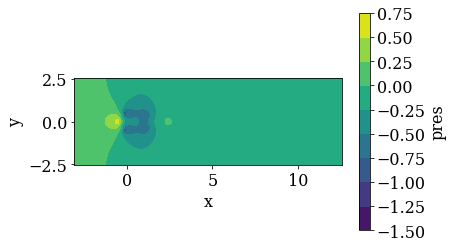

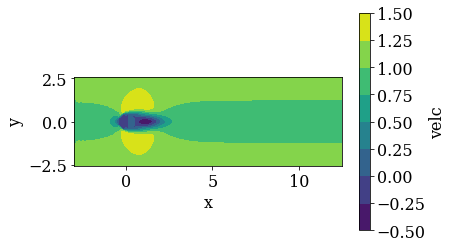

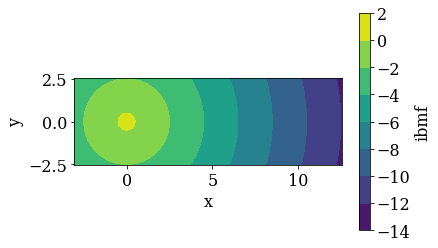

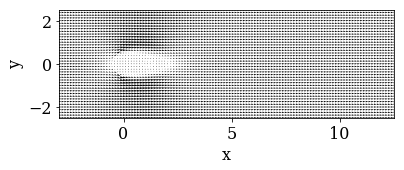

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridc, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')